# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)





624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
import json
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "dikson"

query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

weather_response = requests.get(query_url)
weather_json = weather_response.json()





In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

latitudes = []
max_temp =[]
windspeed = []
humidity = []
date = []
country = []
cloudiness = []
city_id = []
lons = []
city_names = []

units = "imperial"

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        print(weather_json['coord']['lat'])
        latitudes.append(weather_json['coord']['lat'])
    except KeyError:
        print(f"coord not found")
        pass

    try:
        print(weather_json['main']['temp_max'])
        max_temp.append(weather_json['main']['temp_max'])
    except KeyError:
        print(f"temp not found")
        pass

    try:
        print(weather_json['wind']['speed'])
        windspeed.append(weather_json['wind']['speed'])
    except KeyError:
        print(f"windpseed not found")
        pass

    try:
        print(weather_json['main']['humidity'])
        humidity.append(weather_json['main']['humidity'])
    except KeyError:
        print(f"humidity not found")
        pass

    try:
        print(weather_json['dt'])
        date.append(weather_json['dt'])
    except KeyError:
        print(f"date not found")
        pass

    try:
        print(weather_json['sys']['country'])
        country.append(weather_json['sys']['country'])
    except KeyError:
        print(f"date not found")
        pass

    try:
        print(weather_json['clouds']['all'])
        cloudiness.append(weather_json['clouds']['all'])
    except KeyError:
        print(f"clouds not found")
        pass

    try:
        print(weather_json['id'])
        city_id.append(weather_json['id'])
    except KeyError:
        print(f"id not found")
        pass

    try:
        print(weather_json['coord']['lon'])
        lons.append(weather_json['coord']['lon'])
    except KeyError:
        print(f"coord not found")
        pass

    try:
        print(weather_json['name'])
        city_names.append(weather_json['name'])
    except KeyError:
        print(f"city not found")
        pass


coord not found
temp not found
windpseed not found
humidity not found
date not found
date not found
clouds not found
id not found
coord not found
city not found
22.9333
66.45
0.47
98
1652566176
MM
30
1314759
97.75
Lashio
20.7
82.22
6.91
69
1652566612
MX
75
4004293
-105.2
Ixtapa
-21.6403
72.86
8.93
72
1652566171
BR
98
3448903
-41.0511
São João da Barra
-21.2078
75.25
5.75
88
1652566613
CK
75
4035715
-159.775
Avarua
-20.0064
75.6
3
77
1652566614
MU
5
934479
57.6608
Grand Gaube
-22.9661
73.26
9.22
73
1652566614
BR
0
3471451
-42.0278
Arraial do Cabo
-54.8
44.26
10.36
70
1652566554
AR
20
3833367
-68.3
Ushuaia
1
74.44
2.35
99
1652566399
BR
100
3407762
-52
Amapá
-45.8742
48.79
1.99
90
1652566461
NZ
100
2191562
170.5036
Dunedin
-33.9258
60.91
10
75
1652566615
ZA
0
3369157
18.4232
Cape Town
59.7035
46.8
4.94
94
1652566616
RU
49
546105
30.7861
Nikolskoye
22.5667
82.94
1.54
69
1652566616
OM
0
286245
59.5289
Sur
-51.6226
44.65
8.05
76
1652566102
AR
20
3838859
-69.2181
Río Gallegos
-21.2
77.16
13.8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create DataFrame
cities_df = pd.DataFrame({
    'City':city_names,
    'Lat': latitudes,
    'Lng': lons,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': windspeed,
    'Country': country,
    'Date': date,
})


#Save Output File to csv
cities_df.to_csv("output/cities.csv")

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lashio,22.9333,97.7500,66.45,98,30,0.47,MM,1652566176
1,Ixtapa,20.7000,-105.2000,82.22,69,75,6.91,MX,1652566612
2,São João da Barra,-21.6403,-41.0511,72.86,72,98,8.93,BR,1652566171
3,Avarua,-21.2078,-159.7750,75.25,88,75,5.75,CK,1652566613
4,Grand Gaube,-20.0064,57.6608,75.60,77,5,3.00,MU,1652566614


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity100_df = cities_df.loc[(
    cities_df["Humidity"] > 100)]
humidity100_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

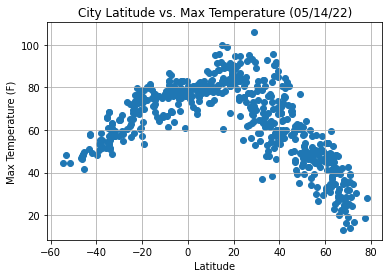

In [10]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/14/22)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

Latitude has an effect on temperature in the way that, the further the locations are from the ecuator the less light they receive. 
Therefore, their temperature drop as we can see from this figure. The temperatures are lower on the far left and on the far right of our figure.

## Latitude vs. Humidity Plot

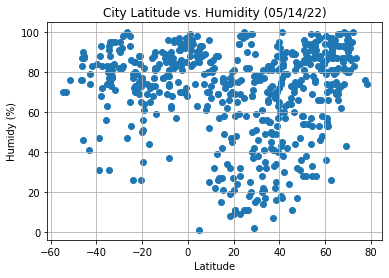

In [11]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/14/22)")
plt.ylabel("Humidy (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

Humidity is higher in locations that are further from the ecuator

## Latitude vs. Cloudiness Plot

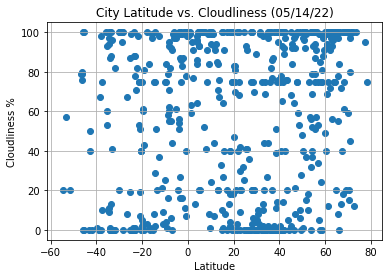

In [12]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudliness (05/14/22)")
plt.ylabel("Cloudliness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

This scatter plot shows that there are more clouds on locations on the North than there are on the South

## Latitude vs. Wind Speed Plot

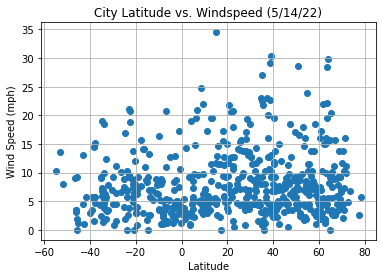

In [13]:
from scipy.stats import linregress

# Build a scatter plot for each data type
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")   #the symbol inside marker can also be "^"

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (5/14/22)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

The majority of these locations have wind speeds between 0mph and 15mph

## Linear Regression

In [14]:
# Show only Latitude greater or equal to 0 
northern_df = cities_df.loc[(
    cities_df["Lat"] >= 0)]
northern_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lashio,22.9333,97.7500,66.45,98,30,0.47,MM,1652566176
1,Ixtapa,20.7000,-105.2000,82.22,69,75,6.91,MX,1652566612
7,Amapá,1.0000,-52.0000,74.44,99,100,2.35,BR,1652566399
10,Nikolskoye,59.7035,30.7861,46.80,94,49,4.94,RU,1652566616
11,Sur,22.5667,59.5289,82.94,69,0,1.54,OM,1652566616


In [15]:
# Show only Latitude less than 0 
southern_df = cities_df.loc[(
    cities_df["Lat"] < 0)]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,São João da Barra,-21.6403,-41.0511,72.86,72,98,8.93,BR,1652566171
3,Avarua,-21.2078,-159.7750,75.25,88,75,5.75,CK,1652566613
4,Grand Gaube,-20.0064,57.6608,75.60,77,5,3.00,MU,1652566614
5,Arraial do Cabo,-22.9661,-42.0278,73.26,73,0,9.22,BR,1652566614
6,Ushuaia,-54.8000,-68.3000,44.26,70,20,10.36,AR,1652566554


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: -0.8349500334663641
R squared: 0.6971415583854825
pvalue: 3.355267435373827e-103


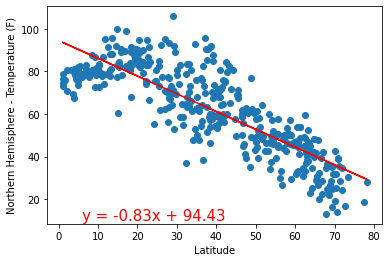

In [17]:
from scipy.stats import linregress
## Convert to floats and store as Latitude and Temperature as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Temperature (F)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: 0.8403872607440163
R squared: 0.7062507480208312
pvalue: 3.7112525426436867e-48


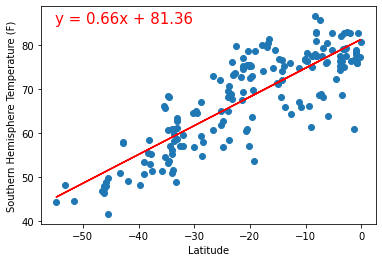

In [18]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Temperature as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Temperature (F)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")
# Show plot
plt.show()

There is a strong correlation between where a location is and its temperature. The above two plots show us that temperature decreases
as the location moves away from the center of 0. This is because the further away the locations are from the ecuator the lower the temperatures
because they get less direct sunlight.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.22835065495736312
R squared: 0.05214402161945671
pvalue: 4.943852512614351e-06


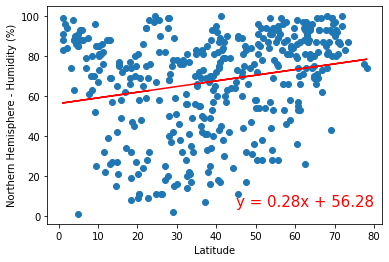

In [19]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Humidity as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Humidity (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.17845891910212458
R squared: 0.03184758580709864
pvalue: 0.01780204887780088


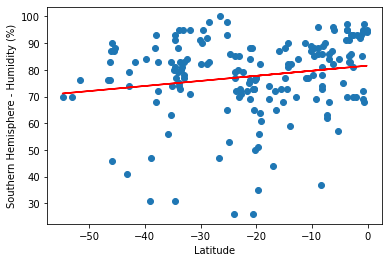

In [20]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Humidity as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Humidity (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

The about two figures show us that there is not a strong correlation relationship between humidity and latitude. We can also see that by noting that their r-values are low, meaning that their relationship is not strong

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.16213216869559804
R squared: 0.026286840125937863
pvalue: 0.0012768196013782029


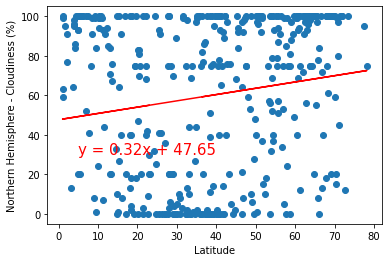

In [21]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Cloudiness (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.21469485812968642
R squared: 0.04609388210732618
pvalue: 0.004217779048533971


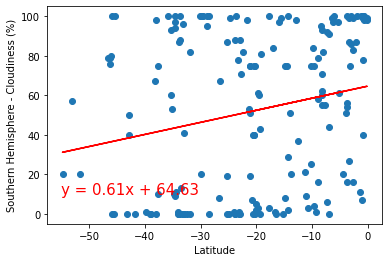

In [22]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Cloudiness (%)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

The above two figures show us that there is no strong correlation relationship between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: -0.02862842173276717
R squared: 0.0008195865309091756
pvalue: 0.5719924347261198


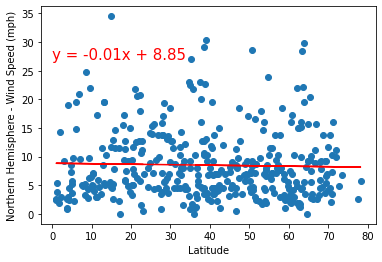

In [23]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Wind Speed as x and y values
x_values = northern_df['Lat'].astype('float')
y_values = northern_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere - Wind Speed (mph)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: -0.09559228729264783
R squared: 0.00913788538984012
pvalue: 0.20693775504239867


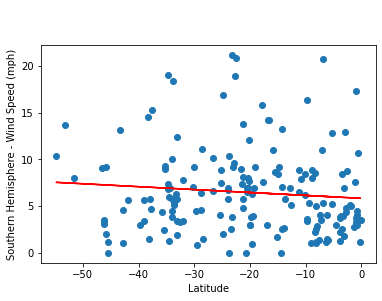

In [24]:
from scipy.stats import linregress
## Convert to floats and store Latitude and Wind Speed as x and y values
x_values = southern_df['Lat'].astype('float')
y_values = southern_df['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere - Wind Speed (mph)')

# Print r-value, r square value, and pvalue
print(f"r-value is: {rvalue}")
print(f"R squared: {rvalue**2}")
print(f"pvalue: {pvalue}")

# Show plot
plt.show()

The last two figures show is that there is no strong correlation relationship between wind speed and latitude on the Southern nor Northern Hemisphere